# Migrating your workflows from The Copernicus Open Access Hub to the Copernicus Data Space Ecosystem

The purpose of this notebook is to demonstrate how easy it is to migrate your workflow from accessing the data through the Copernicus Open Access Hub to using APIs to access the data via the Copernicus Data Space Ecosystem. In this notebook, we will show you how to:
- setup your credentials
- search, discover and download Sentinel-2 L2A Granules using Open Data Protocol (OData)
- search, discover and download Sentinel-2 L2A data using Sentinel Hub APIs.

First we need to import some prerequisite libraries: 

In [3]:
# Utilities
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

from sentinelhub import (SHConfig, DataCollection, SentinelHubCatalog, SentinelHubRequest, BBox, bbox_to_dimensions, CRS, MimeType, Geometry)

from utils import plot_image

## OData
OData (Open Data Protocol) is a standard that specifies a variety of best practices for creating and using REST APIs. OData makes it possible to build REST-based data services that let Web clients publish and edit resources that are recognized by Uniform Resource Locators (URLs) and described in a data model using straightforward HTTP messages. This is the method you will want to use if your workflow requires the download of full products/granules/tiles from [Open Access Hub](https://scihub.copernicus.eu/). In the following cells we will show you how to do the same with Copernicus Data Space Ecosystem. The documentation regarding this can be found [here](https://documentation.dataspace.copernicus.eu/APIs/OData.html).

In this example, we will search the catalogue, generate the required credentials and then download a Sentinel-2 L2A granule using this protocol:

### Setting our search parameters

Firstly, we need to define our `start_date` and `end_date`, the `data_collection` and the area of interest (`aoi`). We define them in the next cell and will insert them into our request as string variables.

In [4]:
start_date = "2022-06-01"
end_date = "2022-06-10"
data_collection = "SENTINEL-2"
aoi = "POLYGON((4.220581 50.958859,4.521264 50.953236,4.545977 50.906064,4.541858 50.802029,4.489685 50.763825,4.23843 50.767734,4.192435 50.806369,4.189689 50.907363,4.220581 50.958859))'"

To search the catalogue we use the following code block:

In [5]:
json = requests.get(f"https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=Collection/Name eq '{data_collection}' and OData.CSC.Intersects(area=geography'SRID=4326;{aoi}) and ContentDate/Start gt {start_date}T00:00:00.000Z and ContentDate/Start lt {end_date}T00:00:00.000Z").json()
pd.DataFrame.from_dict(json['value']).head(5)

,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint
0,application/octet-stream,3f7519e1-f71b-5ab9-9e9e-c823b0439dfd,S2A_MSIL2A_20220606T103631_N0400_R008_T31UFS_2...,application/octet-stream,0,2022-06-06T20:39:26.524Z,2022-06-06T20:54:25.689Z,2022-06-06T20:54:25.689Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/06/06/S2A_MSIL...,[],"{'Start': '2022-06-06T10:36:31.024Z', 'End': '...",geography'SRID=4326;POLYGON ((4.4359922508142 ...,"{'type': 'Polygon', 'coordinates': [[[4.435992..."
1,application/octet-stream,a5f89f85-362d-5bb3-a321-403044ca872e,S2A_MSIL2A_20220609T104631_N0400_R051_T31UES_2...,application/octet-stream,0,2022-06-09T19:18:07.672Z,2022-06-10T06:39:41.624Z,2022-06-10T06:39:41.624Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/06/09/S2A_MSIL...,[],"{'Start': '2022-06-09T10:46:31.024Z', 'End': '...",geography'SRID=4326;POLYGON ((2.9997121758513 ...,"{'type': 'Polygon', 'coordinates': [[[2.999712..."
2,application/octet-stream,17d4e28f-e664-54f0-842d-caf47ffaaa61,S2B_MSIL2A_20220604T104619_N0400_R051_T31UFS_2...,application/octet-stream,0,2022-06-04T19:58:20.266Z,2022-06-04T20:05:58.342Z,2022-06-04T20:05:58.342Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/06/04/S2B_MSIL...,[],"{'Start': '2022-06-04T10:46:19.024Z', 'End': '...",geography'SRID=4326;POLYGON ((5.9668999503726 ...,"{'type': 'Polygon', 'coordinates': [[[5.966899..."
3,application/octet-stream,fbf5d2f2-48a1-5173-a8df-f73fcfb6dcc8,S2A_MSIL1C_20220606T103631_N0400_R008_T31UFS_2...,application/octet-stream,0,2022-06-06T19:07:07.262Z,2022-06-06T19:14:58.590Z,2022-06-06T19:14:58.590Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/06/06/S2A_MSIL...,[],"{'Start': '2022-06-06T10:36:31.024Z', 'End': '...",geography'SRID=4326;POLYGON ((4.4359922508142 ...,"{'type': 'Polygon', 'coordinates': [[[4.435992..."
4,application/octet-stream,acdd7b9a-a5d4-5d10-9ac8-554623b8a0c9,S2B_MSIL2A_20220604T104619_N0400_R051_T31UES_2...,application/octet-stream,0,2022-06-04T19:59:16.441Z,2022-06-04T20:08:35.955Z,2022-06-04T20:08:35.955Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/06/04/S2B_MSIL...,[],"{'Start': '2022-06-04T10:46:19.024Z', 'End': '...",geography'SRID=4326;POLYGON ((2.9997121758513 ...,"{'type': 'Polygon', 'coordinates': [[[2.999712..."


### Retrieving your Keycloak Token

Whilst no credentials are needed to search the catalogue; in order to download products from CDSE catalogue using OData and OpenSearch API users are required to have a Keycloak token. This token can be generated in both Linux and Window OS using either `cURL` or `python` script. You can generate this token using the following code block (more information can be found in our [documentation](https://documentation.dataspace.copernicus.eu/APIs/Token.html)).

To obtain your token, you are required to provide your Copernicus Data Space Ecosystem `username` and `password`. In this example, we import them from a Python file called `creds.py` and import the credentials as variables into the `get_keycloak()` function (To run the following cell yourself, you will need to create this file yourself.). 

In [6]:
# Import credentials
#from creds import *

def get_keycloak(username: str, password: str) -> str:
    data = {
        "client_id": "cdse-public",
        "username": username,
        "password": password,
        "grant_type": "password",
        }
    try:
        r = requests.post("https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token",
        data=data,
        )
        r.raise_for_status()
    except Exception as e:
        raise Exception(
            f"Keycloak token creation failed. Reponse from the server was: {r.json()}"
            )
    return r.json()["access_token"]
        

keycloak_token = get_keycloak("gonzalezsaezdiez@gmail.com", "Workwork2023!")

Once you have your token, you require a product Id which can be found in the response of the products search: https://catalogue.dataspace.copernicus.eu/odata/v1/Products. This can either be parsed or copied from the json response we have already generated. We insert the product Id into the url parameter in the below cell. 

Running the cell will download the zipped Sentinel-2 L2A Granule to the same directory as the Jupyter Notebook:

In [7]:
session = requests.Session()
session.headers.update({'Authorization': f'Bearer {keycloak_token}'})
url = f"https://catalogue.dataspace.copernicus.eu/odata/v1/Products(acdd7b9a-a5d4-5d10-9ac8-554623b8a0c9)/$value"
response = session.get(url, allow_redirects=False)
while response.status_code in (301, 302, 303, 307):
    url = response.headers['Location']
    response = session.get(url, allow_redirects=False)

file = session.get(url, verify=False, allow_redirects=True)

with open(f"product.zip", 'wb') as p:
    p.write(file.content)

## Accessing data via Sentinel Hub APIs

The [Sentinel Hub API](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub.html) is a RESTful API interface that provides access to various satellite imagery archives. It allows you to access raw satellite data, [rendered images](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Process.html), [statistical analysis](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Statistical.html), and other features. 

In these examples, we will be using the `sentinelhub` python [package](https://sentinelhub-py.readthedocs.io/en/latest/index.html). The sentinelhub Python package is the official Python interface for [Sentinel Hub](https://www.sentinel-hub.com/) services. The package provides a collection of basic tools and utilities for working with geospatial and satellite data. It builds on top of well known packages such as `numpy`, `shapely`, `pyproj`.

To successfully run this notebook, make sure that you install or upgrade to at least Version `3.9.1`.

### Credentials

Credentials for Sentinel Hub services are automatically injected as environement variables. It is therefore easy to populate Sentinel Hub's credential manager with the values. To obtain your `client_id` & `client_secret` you need to navigate to your [Dashboard](https://shapps.dataspace.copernicus.eu/dashboard/#/). In the User Settings you can create a new OAuth Client to generate these credentials. For more detailed instructions, visit the relevent [documentation page](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Overview/Authentication.html).

Instructions on how to configure your Sentinel Hub Python package can be found [here](https://sentinelhub-py.readthedocs.io/en/latest/configure.html). Using these instructions you can create a profile specific to using the package for accessing Copernicus Data Space Ecosystem data collections. To import the `CLIENT ID` and `CLIENT SECRET` you can use the same method as in generating the Keycloak Token.

In [8]:
config = SHConfig()

config.sh_client_id = "sh-6b51cffc-a250-4249-8907-4fc56ae1a689 "
config.sh_client_secret = "ZHVi8DQGf8vioS1VjAdjcbt2QobzE89a"
config.sh_token_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
config.sh_base_url = "https://sh.dataspace.copernicus.eu"
config.save("cdse")
# Saved config can be later accessed with config = SHConfig("cdse")

config = SHConfig("cdse")

### Setting an area of interest

The bounding box in `WGS84` coordinate system is `[(longitude and latitude coordinates of lower left and upper right corners)]`. You can get the bbox for a different area at the [bboxfinder](http://bboxfinder.com/) website.

All requests require a bounding box to be given as an instance of `sentinelhub.geometry.BBox` with corresponding Coordinate Reference System (`sentinelhub.constants.CRS`). In our case it is in WGS84 and we can use the predefined WGS84 coordinate reference system from `sentinelhub.constants.CRS`.

In [9]:
aoi_coords_wgs84 = [26.101111111111113, -11.0038889, 26.245, -11.1372222]

When the bounding box bounds have been defined, you can initialize the `BBox` of the area of interest. Using the `bbox_to_dimensions` utility function, you can provide the desired resolution parameter of the image in meters and obtain the output image shape.

In [10]:
resolution = 10
aoi_bbox = BBox(bbox=aoi_coords_wgs84, crs=CRS.WGS84)
aoi_size = bbox_to_dimensions(aoi_bbox, resolution=resolution)

print(f'Image shape at {resolution} m resolution: {aoi_size} pixels')

Image shape at 10 m resolution: (1568, 1479) pixels


### Catalog API
To search and discover data, you can use the Catalog API. Sentinel Hub Catalog API (or shortly "Catalog") is an API implementing the STAC Specification, providing geospatial information for data available in Sentinel Hub. Firstly, to initialise the `SentinelHubCatalog` class we will use:

In [11]:
catalog = SentinelHubCatalog(config=config)

Now we can build the Catalog API request; to do this we use the `aoi_bbox` we defined earlier as well as `time_interval` and insert these into the request:

In [12]:
aoi_bbox = BBox(bbox=aoi_coords_wgs84, crs=CRS.WGS84)
time_interval = '2022-01-01', '2023-07-20'

search_iterator = catalog.search(
    DataCollection.SENTINEL2_L2A,
    bbox=aoi_bbox,
    time=time_interval,
    fields={"include": ["id", "properties.datetime"], "exclude": []},

)

results = list(search_iterator)
print("Total number of results:", len(results))

#results

Total number of results: 447


### Process API

#### Example 1: True Color Image

We build the request according to the [API Reference](https://docs.sentinel-hub.com/api/latest/reference/), using the `SentinelHubRequest` class. Each Process API request also needs an [evalscript](https://docs.sentinel-hub.com/api/latest/#/Evalscript/V3/README).

The information that we specify in the `SentinelHubRequest` object is:
- an evalscript,
- a list of input data collections with time interval,
- a format of the response,
- a bounding box and it’s size (size or resolution).
- `mosaickingOrder` (optional): in this example we have used `leastCC` which will return pixels from the least cloudy acquisition in the specified time period.

The evalscript in the example is used to select the appropriate bands. We return the RGB (B04, B03, B02) Sentinel-2 L2A bands.

The least cloudy image from the time period is downloaded. Without any additional parameters in the evalscript, the downloaded data will correspond to reflectance values in `UINT8` format (values in 0-255 range).

In [32]:
evalscript_true_color = """//VERSION=3

let index = B11 / B08;
return[index]
"""

In [33]:
request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A.define_from(
                name="s2", service_url="https://sh.dataspace.copernicus.eu"
            ),
            time_interval=('2022-07-01', '2022-07-20'),
            other_args={"dataFilter": {"mosaickingOrder": "leastCC"}}           )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=aoi_bbox,
    size=aoi_size,
    config=config,
)


The method `get_data()` will always return a list of length 1 with the available image from the requested time interval in the form of numpy arrays.

In [34]:
true_color_imgs = request_true_color.get_data()

In [59]:
print(f"Returned data is of type = {type(true_color_imgs)} and length {len(true_color_imgs)}.")
print(f"Single element in the list is of type {type(true_color_imgs[-1])} and has shape {true_color_imgs[-1].shape}")

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (1479, 1568, 3)


Image type: uint8


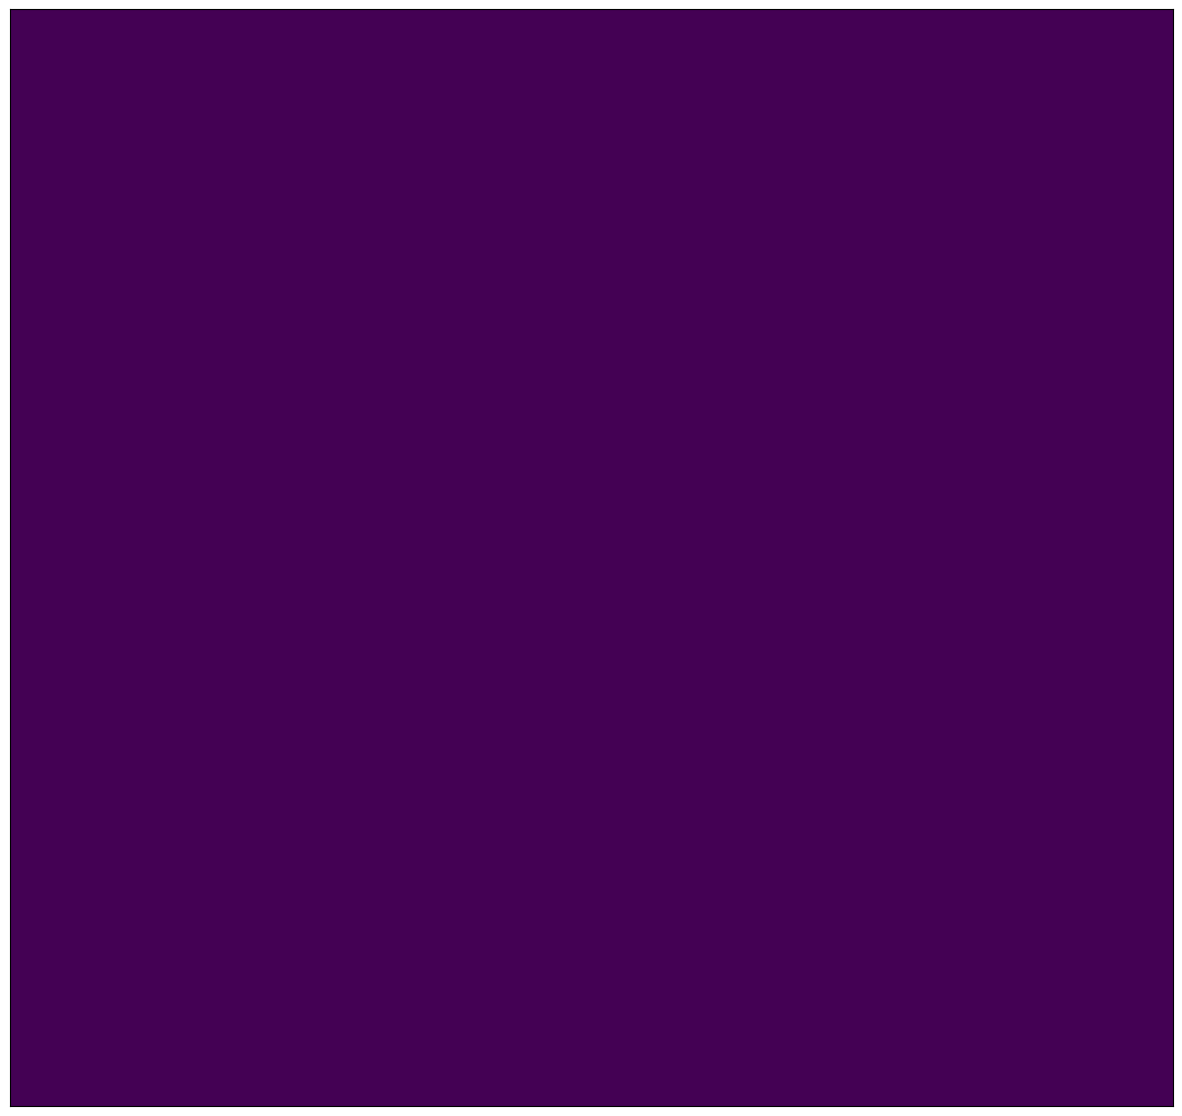

In [35]:
image = true_color_imgs[0]
print(f"Image type: {image.dtype}")

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness
plot_image(image, factor=3.5 / 255, clip_range=(0, 1))

#### Example 2: NDVI Image

Secondly, we will also show you an example of how to calculate and visualise NDVI using the same API. NDVI calculation is a very commonly used spectral vegetation index for vegetation monitoring, for example, monitoring crop growth and yields. As you will notice in the codeblock below, the evalscript has changed substantially:
- we are only using Band 4 and Band 8 as an input into our script.
- The `ColorGradientVisualizer` function has also been utilised in this script. More about this can be found in the documentation [here](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Evalscript/Functions.html#colormapvisualizer).

In [22]:
evalscript_ndvi = """
//VERSION=3
function setup() {
  return {
    input: [{
      bands: [
        "B04",
        "B08",
        "dataMask"
      ]
    }],
    output: {
      bands: 4
    }
  }
}
  
let viz = ColorGradientVisualizer.createWhiteGreen(-1.0, 1.0);

function evaluatePixel(samples) {
    let val = (samples.B08 - samples.B04) / (samples.B08 + samples.B04);
    val = viz.process(val);
    val.push(samples.dataMask);
    return val;
}
"""

request_ndvi_img = SentinelHubRequest(
    evalscript=evalscript_ndvi,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A.define_from(
                name="s2", service_url="https://sh.dataspace.copernicus.eu"
            ),
            time_interval=('2022-07-01', '2022-07-20'),
            other_args={"dataFilter": {"mosaickingOrder": "leastCC"}}           )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=aoi_bbox,
    size=aoi_size,
    config=config,
)

The same method as before is used to request and then visualise the data. In the visualisation, the lighter greens indicate a higher NDVI value (vegetation, forest) and the darker greens (urban areas and water bodies) represent areas with lower NDVI values.

In [23]:
ndvi_img = request_ndvi_img.get_data()

In [24]:
print(f"Returned data is of type = {type(true_color_imgs)} and length {len(true_color_imgs)}.")
print(f"Single element in the list is of type {type(true_color_imgs[-1])} and has shape {true_color_imgs[-1].shape}")

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (1477, 955, 3)


Image type: uint8


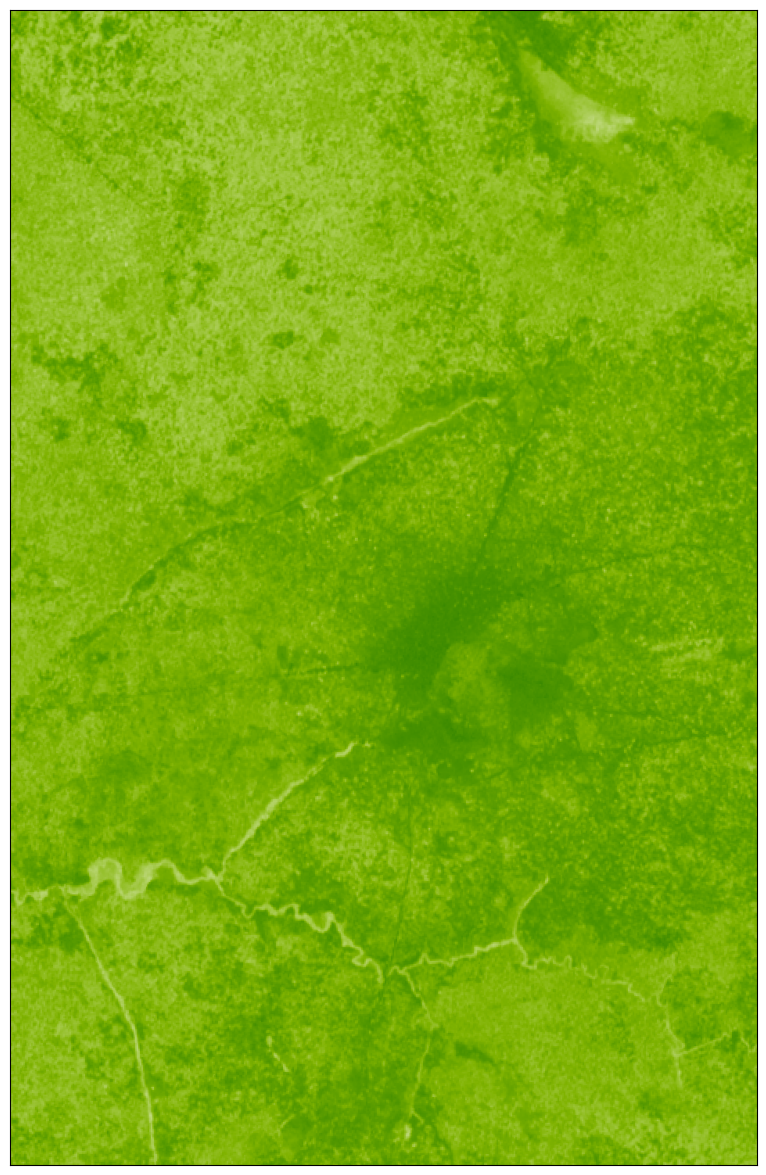

In [25]:
image = ndvi_img[0]
print(f"Image type: {image.dtype}")

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness
plot_image(image, factor= 1 / 255, clip_range=(-1, 1))

## Summary

So what have we learnt in this notebook?

- Setting up credentials to access the Copernicus Data Space Ecosystem through OData and Sentinel Hub APIs.
- Searching and discovering Copernicus data through OData protocols and downloading full Sentinel-2 L2A Granules.
- How to quickly access satellite imagery though Sentinel Hub using Process API.

With this short guide, we hope to have clarified how the Copernicus Data Space Ecosystem can serve you beyond simply downloading raw images. At this point, you may want to consider which steps of your processing pipeline you prefer to do in house after downloading the data, and which operations you would rather have as part of the pre-processing in the cloud.